In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid')
import statsmodels.formula.api as smf
import numpy as np

In [3]:
df = pd.read_csv('c:/users/clmnv/desktop/ACISDailyData_2013_2021.csv')

In [ ]:
df.head()

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df.head()

,Station_Name,Date,Air_Temp_Min,Air_Temp_Min_Source_Flag,Air_Temp_Max,Air_Temp_Max_Source_Flag,Air_Temp_Avg,Air_Temp_Avg_Source_Flag,Wind_Speed_10m_Avg_(km/h),Wind_Speed_10m_Avg_Source_Flag,Wind_Dir_10m_Avg,Wind_Dir_10m_Avg_Source_Flag,Heating_Degree_Days_(DD),Heating_Degree_Days_Source_Flag,Cooling_Degree_Days_(DD),Cooling_Degree_Days_Source_Flag
0,Calgary Intl A,2013-04-01,-3.8,COMPUTED,8.9,COMPUTED,2.3,AGGREGATED,NaN,UNAVAILBLE,NaN,UNAVAILBLE,17.1,COMPUTED,0.0,COMPUTED
1,Calgary Intl A,2013-04-02,-1.6,COMPUTED,16.8,COMPUTED,7.5,AGGREGATED,NaN,UNAVAILBLE,NaN,UNAVAILBLE,17.4,COMPUTED,0.0,COMPUTED
2,Calgary Intl A,2013-04-03,-1.2,COMPUTED,6.7,COMPUTED,1.1,AGGREGATED,NaN,UNAVAILBLE,NaN,UNAVAILBLE,17.4,COMPUTED,0.0,COMPUTED
3,Calgary Intl A,2013-04-04,-2.7,COMPUTED,4.7,COMPUTED,0.8,AGGREGATED,NaN,UNAVAILBLE,NaN,UNAVAILBLE,17.1,COMPUTED,0.0,COMPUTED
4,Calgary Intl A,2013-04-05,-3.0,COMPUTED,4.7,COMPUTED,1.0,AGGREGATED,NaN,UNAVAILBLE,NaN,UNAVAILBLE,17.0,COMPUTED,0.0,COMPUTED


In [5]:
filtered_df = df.query("Date >= '2019-01-01' \
                       and Date <= '2019-12-31'")
filtered_df.head()

,Station_Name,Date,Air_Temp_Min,Air_Temp_Min_Source_Flag,Air_Temp_Max,Air_Temp_Max_Source_Flag,Air_Temp_Avg,Air_Temp_Avg_Source_Flag,Wind_Speed_10m_Avg_(km/h),Wind_Speed_10m_Avg_Source_Flag,Wind_Dir_10m_Avg,Wind_Dir_10m_Avg_Source_Flag,Heating_Degree_Days_(DD),Heating_Degree_Days_Source_Flag,Cooling_Degree_Days_(DD),Cooling_Degree_Days_Source_Flag
2101,Calgary Intl A,2019-01-01,-11.6,ACTUAL,5.9,ACTUAL,1.5,AGGREGATED,14.3,AGGREGATED,274.7,AGGREGATED,26.9,COMPUTED,0.0,COMPUTED
2102,Calgary Intl A,2019-01-02,4.9,ACTUAL,11.1,ACTUAL,8.4,AGGREGATED,28.8,AGGREGATED,271.0,AGGREGATED,25.9,COMPUTED,0.0,COMPUTED
2103,Calgary Intl A,2019-01-03,-0.6,ACTUAL,9.7,ACTUAL,4.3,AGGREGATED,10.6,AGGREGATED,191.7,AGGREGATED,26.0,COMPUTED,0.0,COMPUTED
2104,Calgary Intl A,2019-01-04,-6.2,ACTUAL,9.4,ACTUAL,1.5,AGGREGATED,14.9,AGGREGATED,317.2,AGGREGATED,26.2,COMPUTED,0.0,COMPUTED
2105,Calgary Intl A,2019-01-05,-9.5,ACTUAL,-4.5,ACTUAL,-7.2,AGGREGATED,7.9,AGGREGATED,163.4,AGGREGATED,27.2,COMPUTED,0.0,COMPUTED


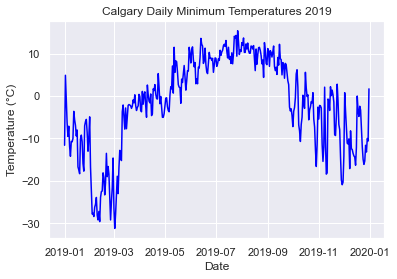

In [6]:
fig, ax = plt.subplots()
  
ax.plot(filtered_df['Date'], filtered_df['Air_Temp_Min'], color='blue')

ax.set(title='Calgary Daily Minimum Temperatures 2019', xlabel="Date", ylabel="Temperature (°C)")
plt.show()
fig.savefig('c:/users/clmnv/desktop/ColdTemp_fig.png', dpi=300)


In [11]:
#shelter_df = pd.read_csv('c:/users/clmnv/desktop/2013_2021_Emergency_Shelter_Occupancy_AB.csv')
#shelter_df['Date'] = pd.to_datetime(shelter_df['Date'], format='%m/%d/%Y', errors='coerce')
shelters = pd.read_csv('c:/users/clmnv/desktop/AB_Shelter_Data_AdultFamilyWomen_2013_2021.csv')
shelters['Date'] = pd.to_datetime(shelters['Date'], format='%m/%d/%Y', errors='coerce')

In [ ]:
#calgary_df = shelter_df[(shelter_df['City'] =='Calgary')]
#calgary_df.head()

In [12]:
shelters_short = shelters.query("Date >= '2019-01-01' \
                       and Date <= '2019-12-31'")
shelters_short.head()

,Date,City,ShelterType,Capacity,Overnight
18623,2019-01-01,Calgary,Adult Emergency,850,658
18624,2019-01-01,Calgary,Adult Emergency,125,0
18625,2019-01-01,Calgary,Adult Emergency,12,9
18626,2019-01-01,Calgary,Adult Emergency,80,78
18627,2019-01-01,Calgary,Adult Emergency,370,293


In [13]:
#calgary_filt_df.set_index('Date', inplace=True)
#calgary_filt_df.index = pd.to_datetime(calgary_filt_df.index)

#yyc_filt_df.groupby(pd.Grouper(freq='D', key='Date'))['Overnight'].sum().reset_index()
sdf = shelters_short.groupby('Date')['Overnight'].sum().reset_index()
#['Overnight'].sum().reset_index()

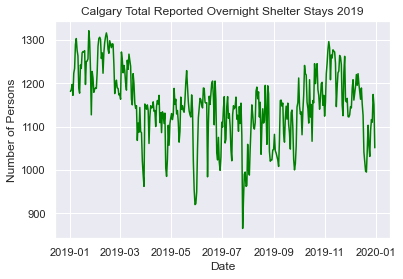

In [14]:
fig, ax = plt.subplots()
  
ax.plot(sdf['Date'], sdf['Overnight'], color='green')

ax.set(title='Calgary Total Reported Overnight Shelter Stays 2019', xlabel="Date", ylabel="Number of Persons")
plt.show()
fig.savefig('c:/users/clmnv/desktop/Shelter_fig.png', dpi=300)

In [15]:
merged_df = pd.merge(filtered_df, sdf, on='Date', how='outer')
merged_df.head()

,Station_Name,Date,Air_Temp_Min,Air_Temp_Min_Source_Flag,Air_Temp_Max,Air_Temp_Max_Source_Flag,Air_Temp_Avg,Air_Temp_Avg_Source_Flag,Wind_Speed_10m_Avg_(km/h),Wind_Speed_10m_Avg_Source_Flag,Wind_Dir_10m_Avg,Wind_Dir_10m_Avg_Source_Flag,Heating_Degree_Days_(DD),Heating_Degree_Days_Source_Flag,Cooling_Degree_Days_(DD),Cooling_Degree_Days_Source_Flag,Overnight
0,Calgary Intl A,2019-01-01,-11.6,ACTUAL,5.9,ACTUAL,1.5,AGGREGATED,14.3,AGGREGATED,274.7,AGGREGATED,26.9,COMPUTED,0.0,COMPUTED,1181
1,Calgary Intl A,2019-01-02,4.9,ACTUAL,11.1,ACTUAL,8.4,AGGREGATED,28.8,AGGREGATED,271.0,AGGREGATED,25.9,COMPUTED,0.0,COMPUTED,1185
2,Calgary Intl A,2019-01-03,-0.6,ACTUAL,9.7,ACTUAL,4.3,AGGREGATED,10.6,AGGREGATED,191.7,AGGREGATED,26.0,COMPUTED,0.0,COMPUTED,1197
3,Calgary Intl A,2019-01-04,-6.2,ACTUAL,9.4,ACTUAL,1.5,AGGREGATED,14.9,AGGREGATED,317.2,AGGREGATED,26.2,COMPUTED,0.0,COMPUTED,1172
4,Calgary Intl A,2019-01-05,-9.5,ACTUAL,-4.5,ACTUAL,-7.2,AGGREGATED,7.9,AGGREGATED,163.4,AGGREGATED,27.2,COMPUTED,0.0,COMPUTED,1223


In [16]:
reg = smf.ols(formula='Overnight~Air_Temp_Min', data=merged_df).fit()
print(reg.params)
print(reg.summary())

y_int = reg.params[0]
x_slope = reg.params[1]

Intercept       1140.450231
Air_Temp_Min      -4.585896
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Overnight   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     207.4
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           1.66e-37
Time:                        15:54:12   Log-Likelihood:                -2046.1
No. Observations:                 365   AIC:                             4096.
Df Residuals:                     363   BIC:                             4104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [17]:
yhat = -4.585896*merged_df['Air_Temp_Min'] + 1140.450231

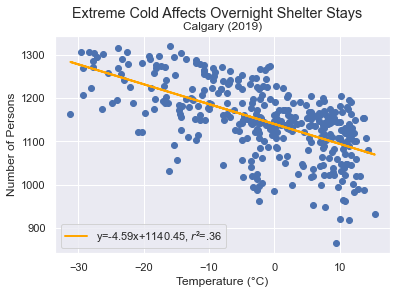

In [18]:
fig, ax = plt.subplots()
ax.scatter(merged_df['Air_Temp_Min'], merged_df['Overnight'])
ax.plot(merged_df['Air_Temp_Min'], yhat, lw=2, c='orange', label='y={:.2f}x+{:.2f}, $r$\u00b2=.36'.format(x_slope,y_int))
ax.set(title='Calgary (2019)', xlabel='Temperature (°C)', ylabel='Number of Persons')
plt.suptitle('Extreme Cold Affects Overnight Shelter Stays')
ax.legend(loc='lower left')
plt.show()
fig.savefig('c:/users/clmnv/desktop/Regression_fig.png', dpi=300)